In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

### Load the data

In [2]:
df = pd.read_csv('Luxury watch.csv')
df.head()

,Brand,Model,Case Material,Strap Material,Movement Type,Water Resistance,Case Diameter (mm),Case Thickness (mm),Band Width (mm),Dial Color,Crystal Material,Complications,Power Reserve,Price (USD)
0,Rolex,Submariner,Stainless Steel,Stainless Steel,Automatic,300 meters,40.0,13.00,20.0,Black,Sapphire,Date,48 hours,"9,500"
1,Omega,Seamaster,Titanium,Rubber,Automatic,600 meters,43.5,14.47,21.0,Blue,Sapphire,Date,60 hours,"5,800"
2,Tag Heuer,Carrera,Stainless Steel,Leather,Automatic,100 meters,41.0,13.00,20.0,White,Sapphire,Chronograph,42 hours,"4,200"
3,Breitling,Navitimer,Stainless Steel,Stainless Steel,Automatic,30 meters,43.0,14.25,22.0,Black,Sapphire,Chronograph,70 hours,"7,900"
4,Cartier,Tank Solo,Stainless Steel,Leather,Quartz,30 meters,31.0,6.05,20.0,Silver,Sapphire,NaN,NaN,"2,800"


### Basic information about the data

In [3]:
df.shape

(507, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand                507 non-null    object 
 1   Model                507 non-null    object 
 2   Case Material        507 non-null    object 
 3   Strap Material       507 non-null    object 
 4   Movement Type        507 non-null    object 
 5   Water Resistance     507 non-null    object 
 6   Case Diameter (mm)   507 non-null    float64
 7   Case Thickness (mm)  507 non-null    float64
 8   Band Width (mm)      507 non-null    float64
 9   Dial Color           507 non-null    object 
 10  Crystal Material     507 non-null    object 
 11  Complications        385 non-null    object 
 12  Power Reserve        493 non-null    object 
 13  Price (USD)          506 non-null    object 
dtypes: float64(3), object(11)
memory usage: 55.6+ KB


### Convert number columns from string to float

In [5]:
df['Price (USD)'] = df['Price (USD)'].apply(lambda x: float(str(x).replace(',','')))

df['Water Resistance'] = df['Water Resistance'].apply(lambda x: float(str(x).replace('meters', '')))

# Function to convert days to hours
def convert_days_to_hours(value):
    if pd.notna(value):  # Check if the value is not NaN
        if 'days' in value:
            days = int(value.split()[0])
            return days * 24
        elif 'hours' in value:
            return int(value.split()[0])
        else: return np.nan
    else:
        return value  # Return NaN if the input is NaN
# Apply the function to the 'Power Reserve' column
df['Power Reserve'] = df['Power Reserve'].apply(convert_days_to_hours)
df['Power Reserve'] = df['Power Reserve'].apply(lambda x: float(str(x).replace('hours', '')))

### Statistics

In [6]:
df.describe()

,Water Resistance,Case Diameter (mm),Case Thickness (mm),Band Width (mm),Power Reserve,Price (USD)
count,507.000000,507.000000,507.000000,507.000000,492.000000,506.000000
mean,122.327416,41.046154,11.588343,21.105523,81.686992,12082.964427
std,149.161382,2.535339,2.491481,1.658375,366.576677,10419.816968
min,30.000000,27.500000,5.000000,15.000000,38.000000,495.000000
25%,50.000000,40.000000,9.800000,20.000000,45.000000,5500.000000
50%,100.000000,41.000000,12.000000,20.000000,55.000000,8350.000000
75%,120.000000,42.000000,13.300000,22.000000,70.000000,16450.000000
max,2000.000000,46.500000,17.500000,28.000000,6480.000000,70000.000000


### Duplicate values

In [7]:
df[df.duplicated()]

,Brand,Model,Case Material,Strap Material,Movement Type,Water Resistance,Case Diameter (mm),Case Thickness (mm),Band Width (mm),Dial Color,Crystal Material,Complications,Power Reserve,Price (USD)
54,Blancpain,Fifty Fathoms,Stainless Steel,Canvas,Automatic,300.0,45.0,15.40,23.0,Black,Sapphire,Date,120.0,11500.0
83,Rolex,Submariner,Stainless Steel,Stainless Steel,Automatic,300.0,40.0,13.00,20.0,Black,Sapphire,Date,48.0,9500.0
84,Omega,Seamaster,Titanium,Rubber,Automatic,600.0,43.5,14.47,21.0,Blue,Sapphire,Date,60.0,5800.0
85,Tag Heuer,Carrera,Stainless Steel,Leather,Automatic,100.0,41.0,13.00,20.0,White,Sapphire,Chronograph,42.0,4200.0
86,Breitling,Navitimer,Stainless Steel,Stainless Steel,Automatic,30.0,43.0,14.25,22.0,Black,Sapphire,Chronograph,70.0,7900.0
87,Cartier,Tank Solo,Stainless Steel,Leather,Quartz,30.0,31.0,6.05,20.0,Silver,Sapphire,NaN,NaN,2800.0
88,Jaeger-LeCoultre,Reverso,Stainless Steel,Leather,Manual,30.0,42.9,9.20,20.0,Black,Sapphire,NaN,45.0,5500.0
151,IWC,Portugieser,Stainless Steel,Leather,Automatic,30.0,41.0,12.30,22.0,Silver,Sapphire,NaN,60.0,7950.0
182,Patek Philippe,Nautilus,Stainless Steel,Stainless Steel,Automatic,120.0,40.5,8.30,22.0,Blue,Sapphire,Date,45.0,34000.0
197,Audemars Piguet,Royal Oak,Stainless Steel,Stainless Steel,Automatic,50.0,41.0,9.80,20.0,Blue,Sapphire,Date,60.0,24500.0


In [8]:
df.duplicated().sum()

19

### Null values

In [9]:
display(df.isnull().sum())

Brand                    0
Model                    0
Case Material            0
Strap Material           0
Movement Type            0
Water Resistance         0
Case Diameter (mm)       0
Case Thickness (mm)      0
Band Width (mm)          0
Dial Color               0
Crystal Material         0
Complications          122
Power Reserve           15
Price (USD)              1
dtype: int64

In [10]:
df["Power Reserve"].median()

55.0

In [11]:
df["Water Resistance"].median()

100.0

### Unique values in the data

In [12]:
catcols = list(df.select_dtypes(include=['object']).columns)
numcols = list(df.select_dtypes(include=['float64','int']).columns)

In [13]:
for cat_col in catcols:
    print(cat_col)
    print(df[cat_col].unique())
    print("\n")

Brand
['Rolex' 'Omega' 'Tag Heuer' 'Breitling' 'Cartier' 'Jaeger-LeCoultre'
 'Seiko' 'Citizen' 'Tissot' 'Hamilton' 'Longines' 'Oris' 'Bell & Ross'
 'Sinn' 'Breguet' 'Audemars Piguet' 'Vacheron Constantin' 'Panerai'
 'Tudor' 'IWC' 'Montblanc' 'Blancpain' 'Zenith' 'Piaget' 'Ulysse Nardin'
 'Jaquet Droz' 'Bulgari' 'Chopard' 'Girard-Perregaux' 'Glashütte Original'
 'Hublot' 'Patek Philippe' 'Bulova' 'A. Lange & Sohne' 'Rado'
 'Frederique Constant' 'TAG Heuer' 'Baume & Mercier' 'A. Lange & Söhne']


Model
['Submariner' 'Seamaster' 'Carrera' 'Navitimer' 'Tank Solo' 'Reverso'
 'Prospex' 'Promaster' 'Le Locle' 'Khaki Field' 'Master Collection'
 'Big Crown ProPilot' 'Aviation' '104' 'Classique' 'Royal Oak' 'Overseas'
 'Speedmaster' 'Superocean' 'Luminor Base Logo' 'Black Bay'
 'GMT-Master II' "Pilot's Watch" 'Master Ultra Thin' 'BR 03-92'
 '1858 Geosphere' 'Santos-Dumont' 'Datejust' 'Speedmaster Moonwatch'
 'Portugieser' 'Fifty Fathoms' 'El Primero' 'Polo S' 'Marine'
 'Grande Seconde' 'Type XXI

### Categorical data (Unique counts)

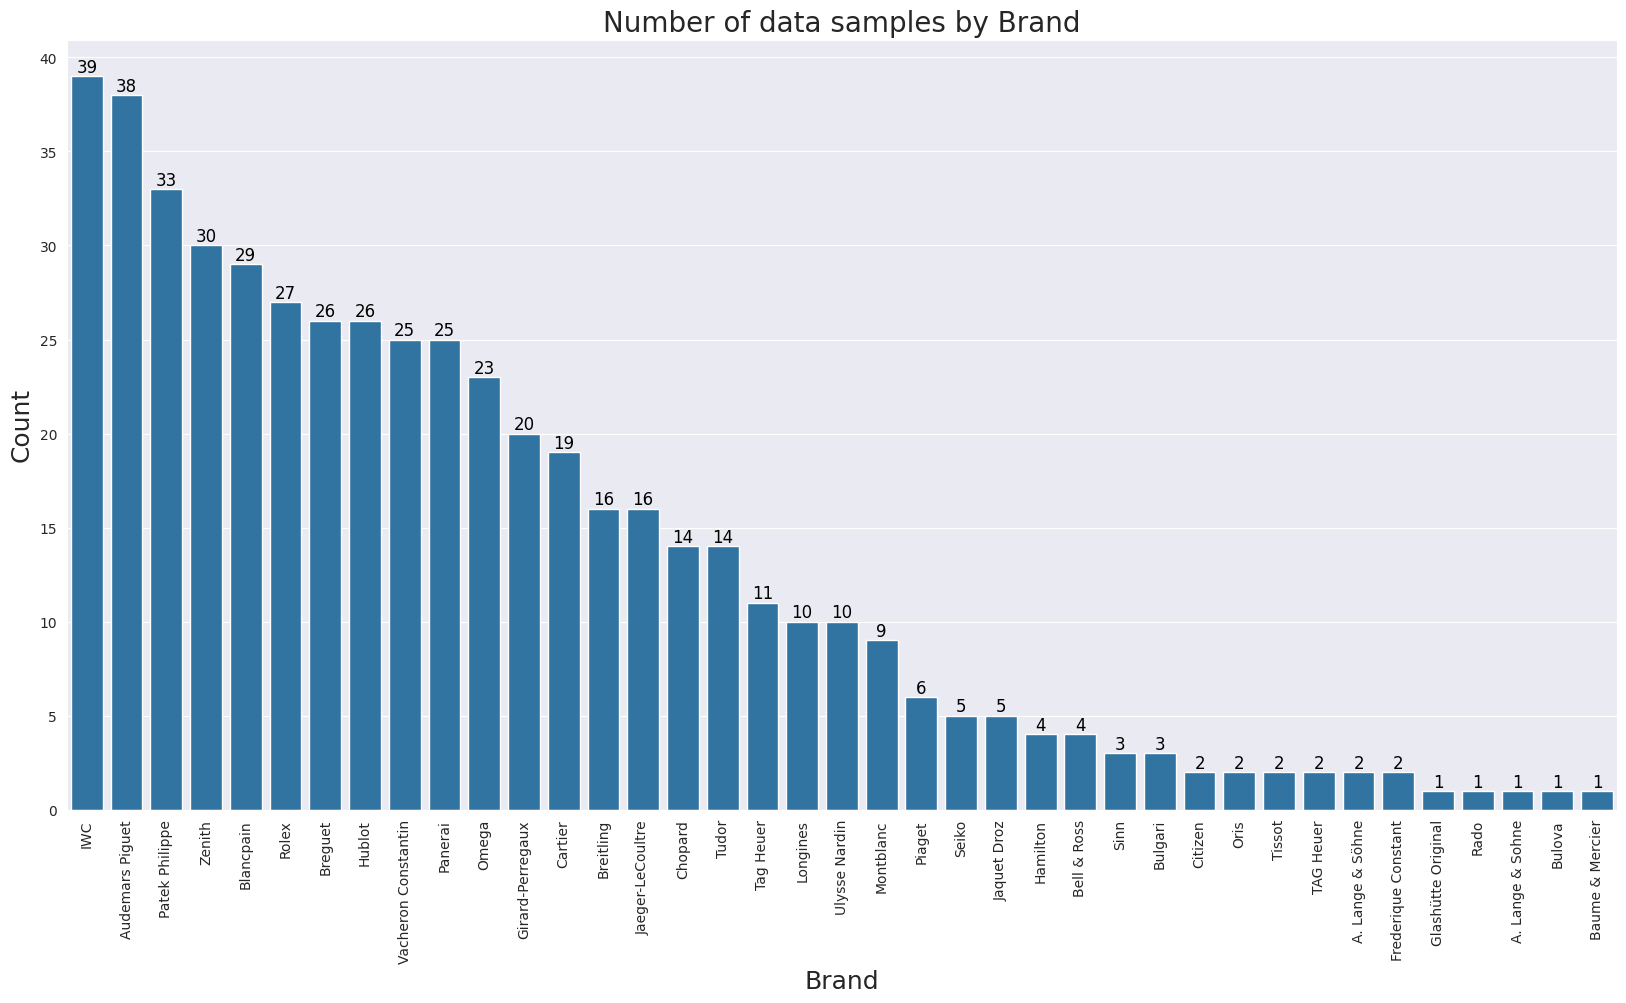

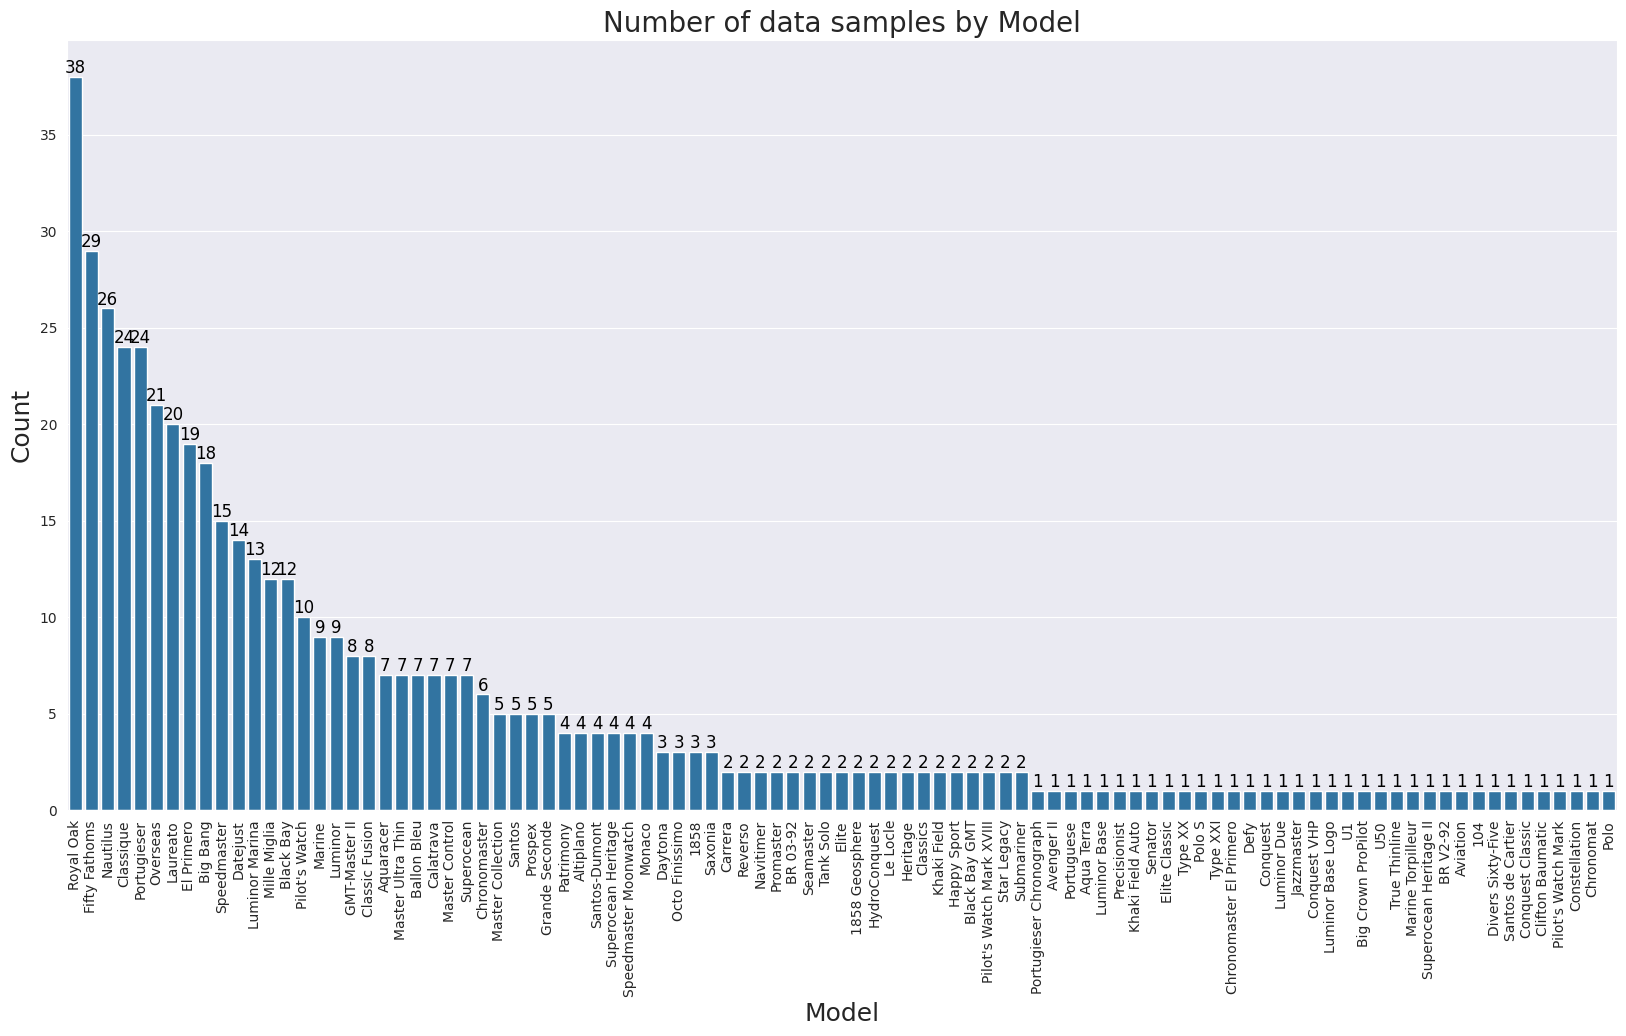

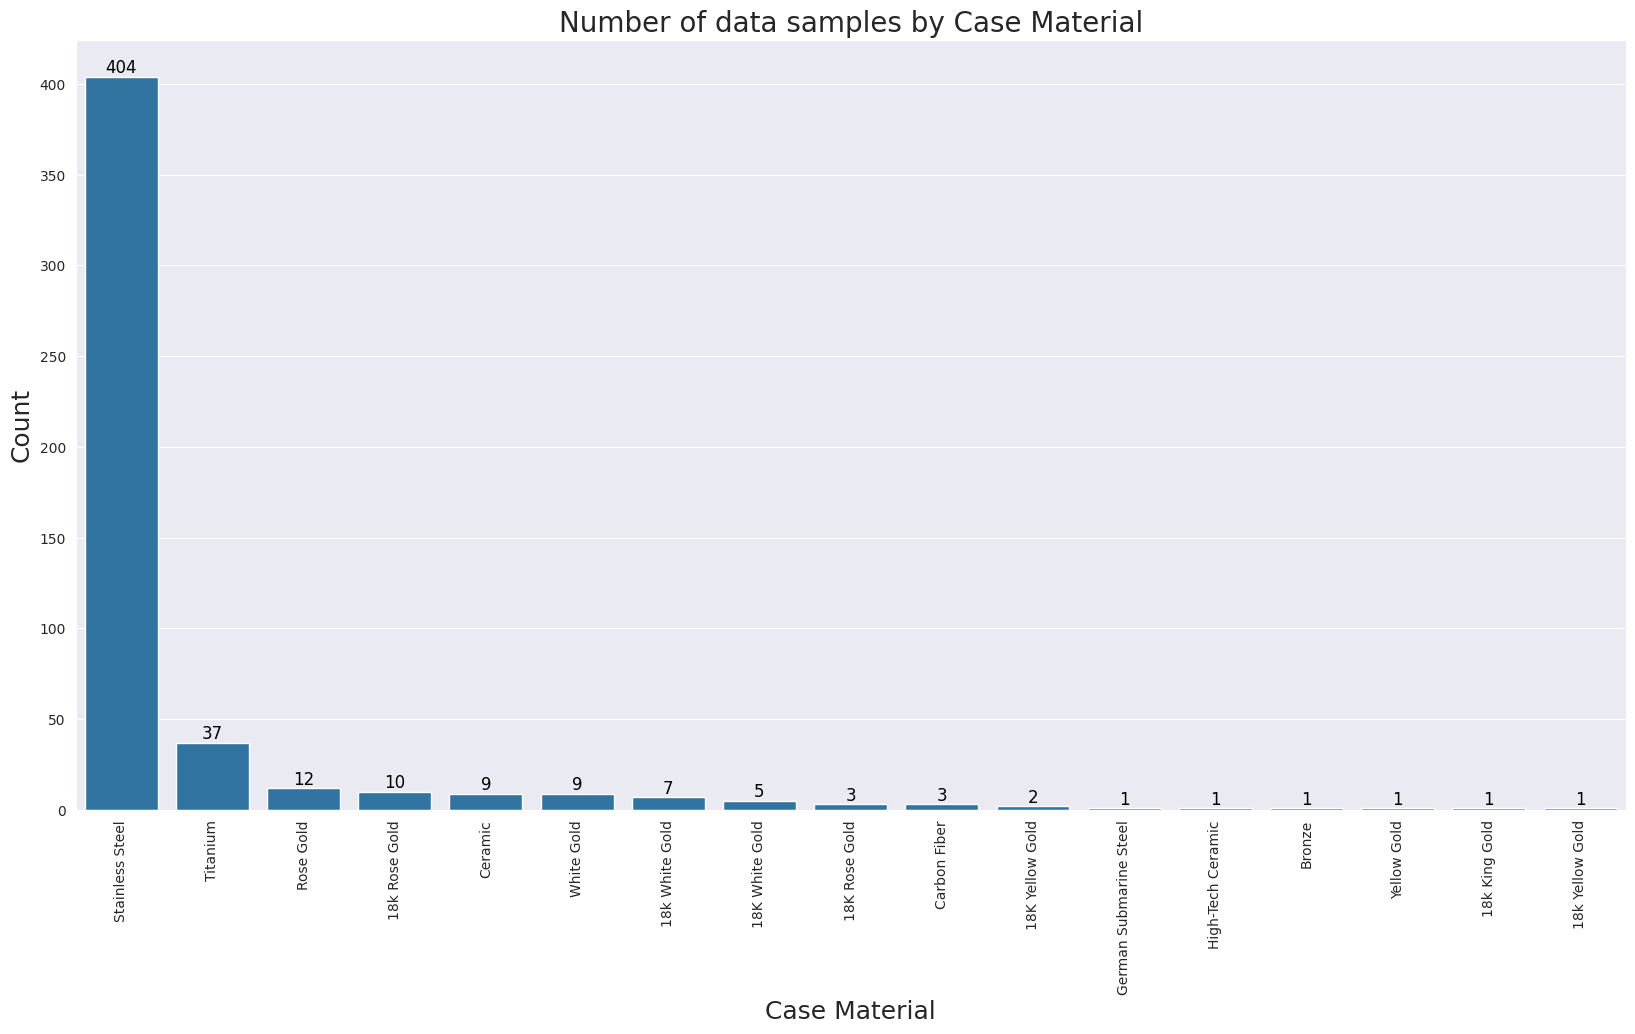

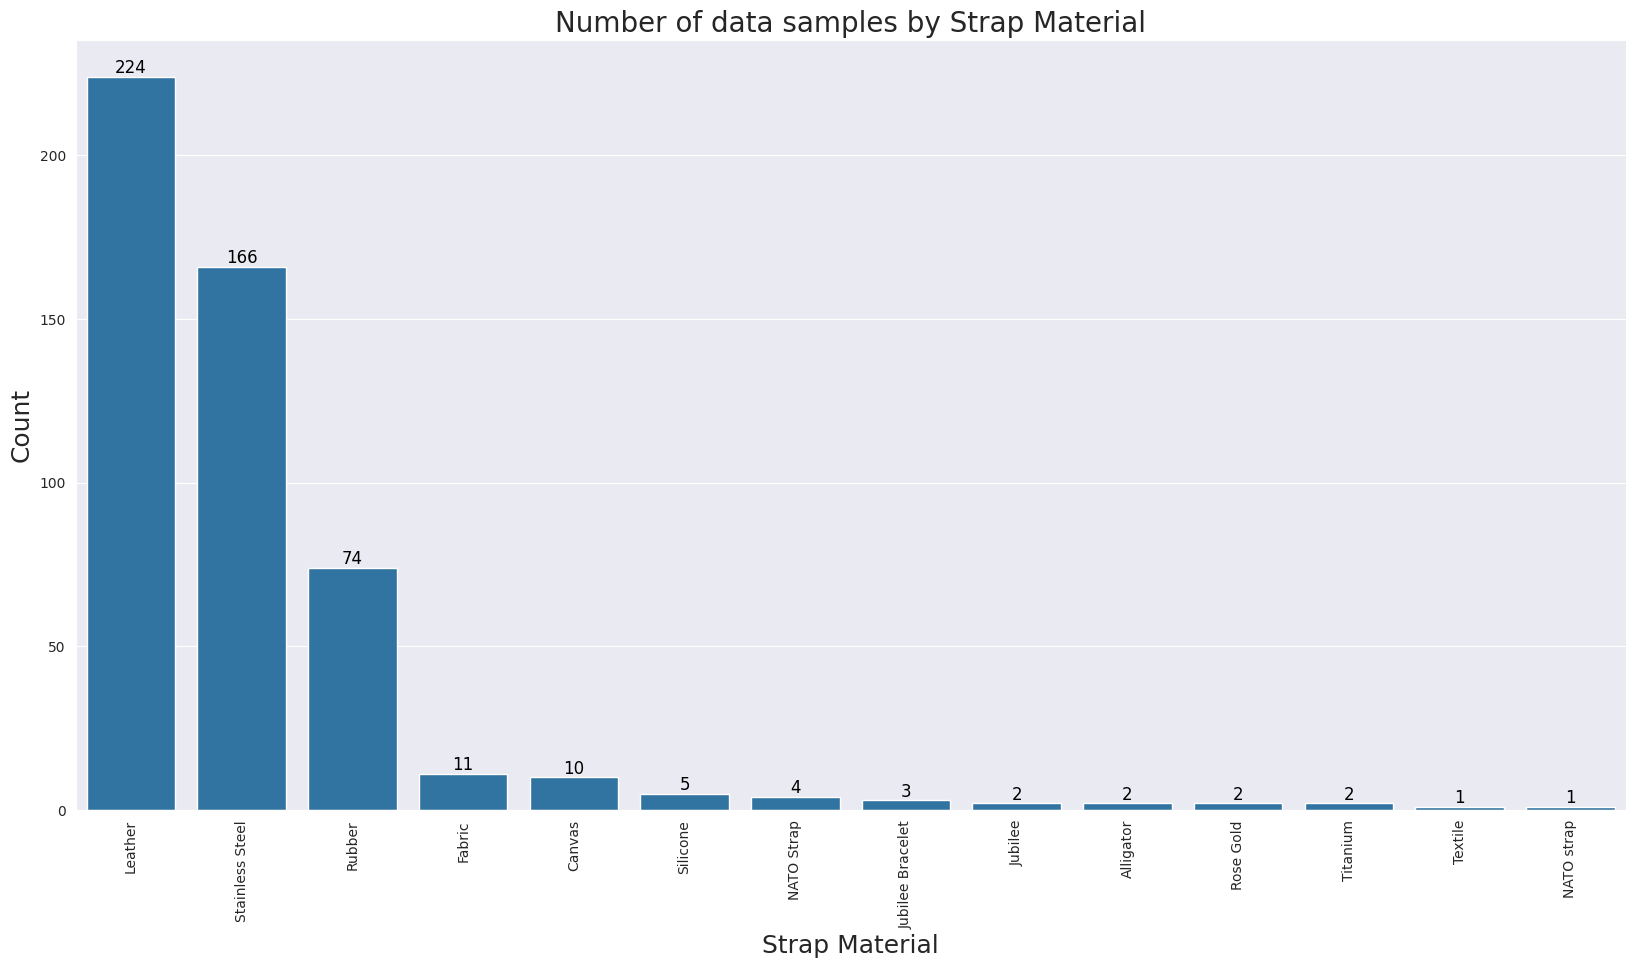

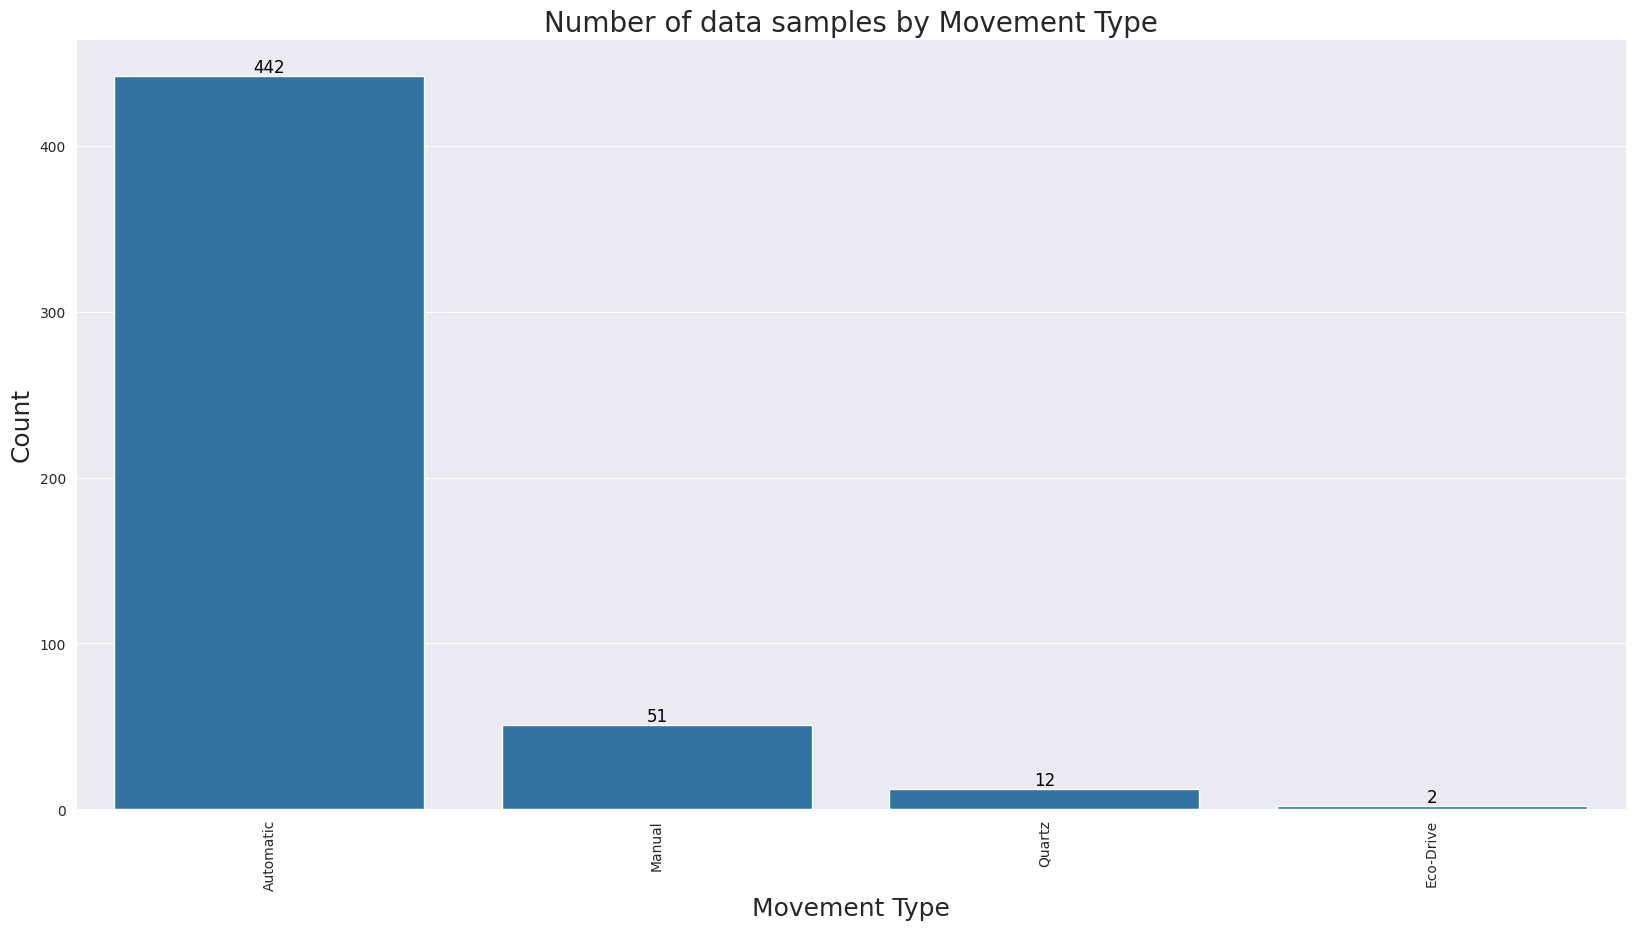

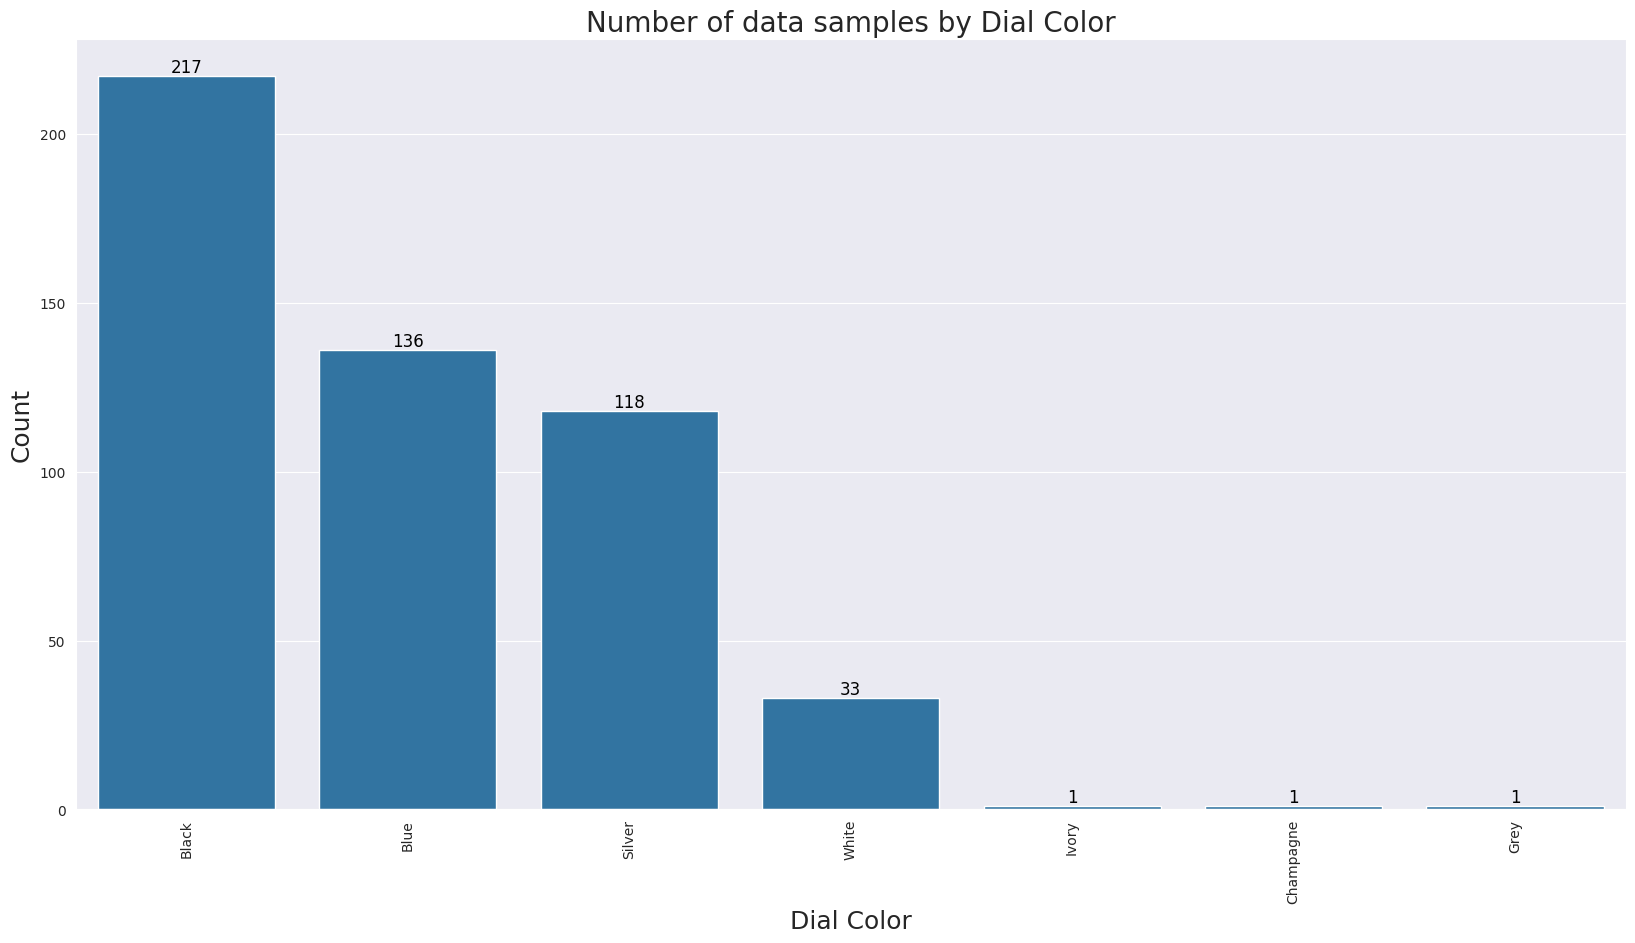

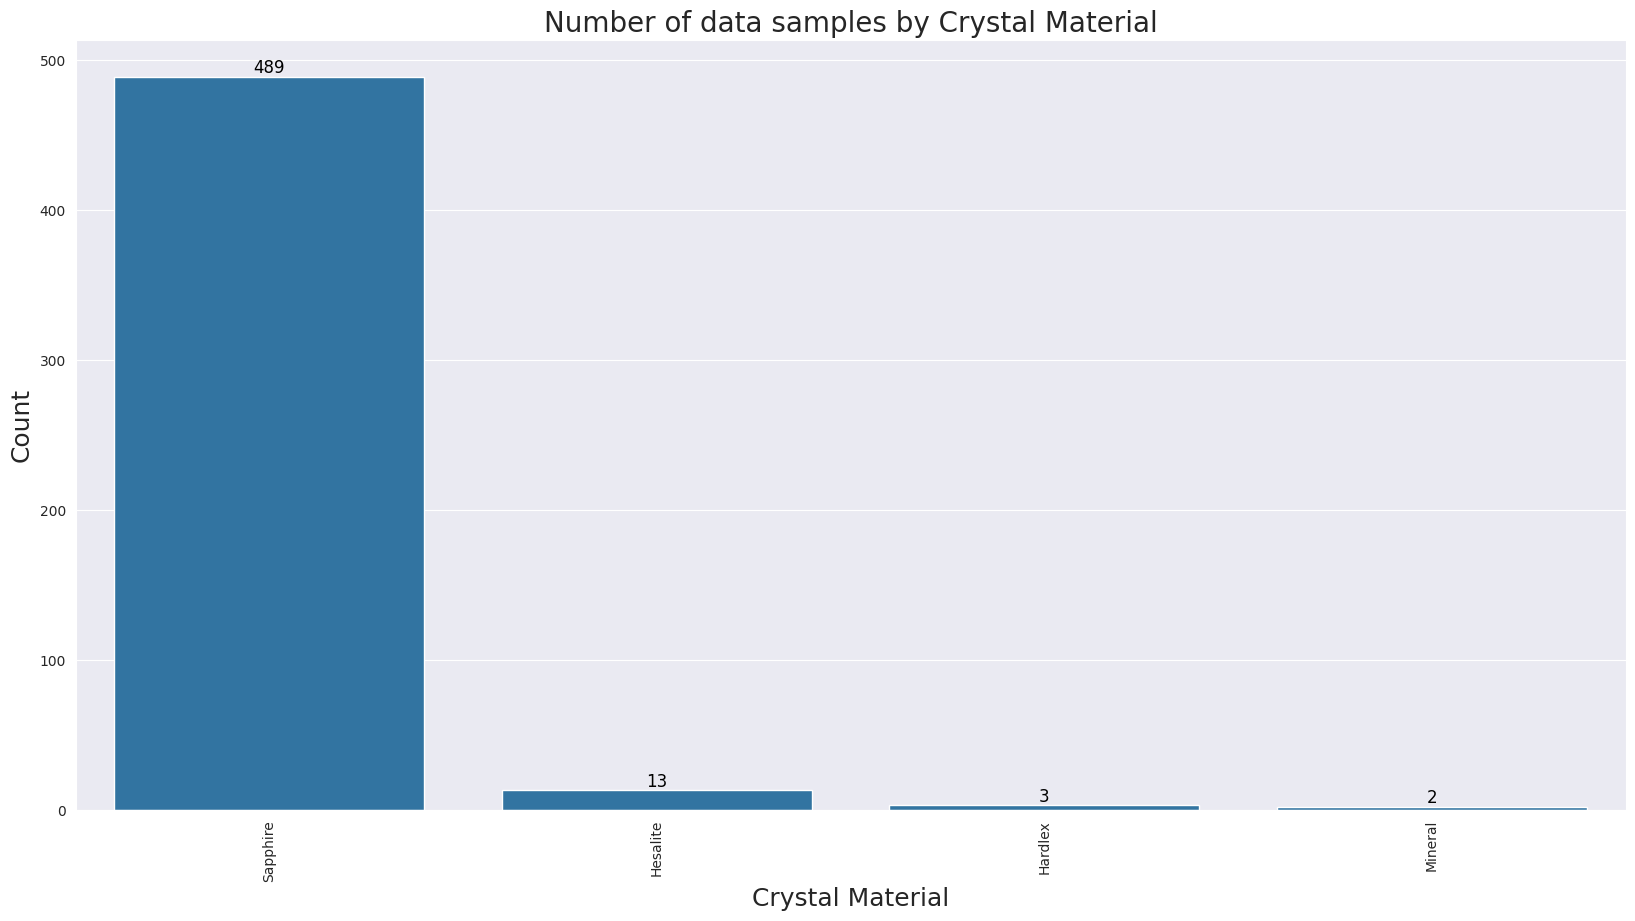

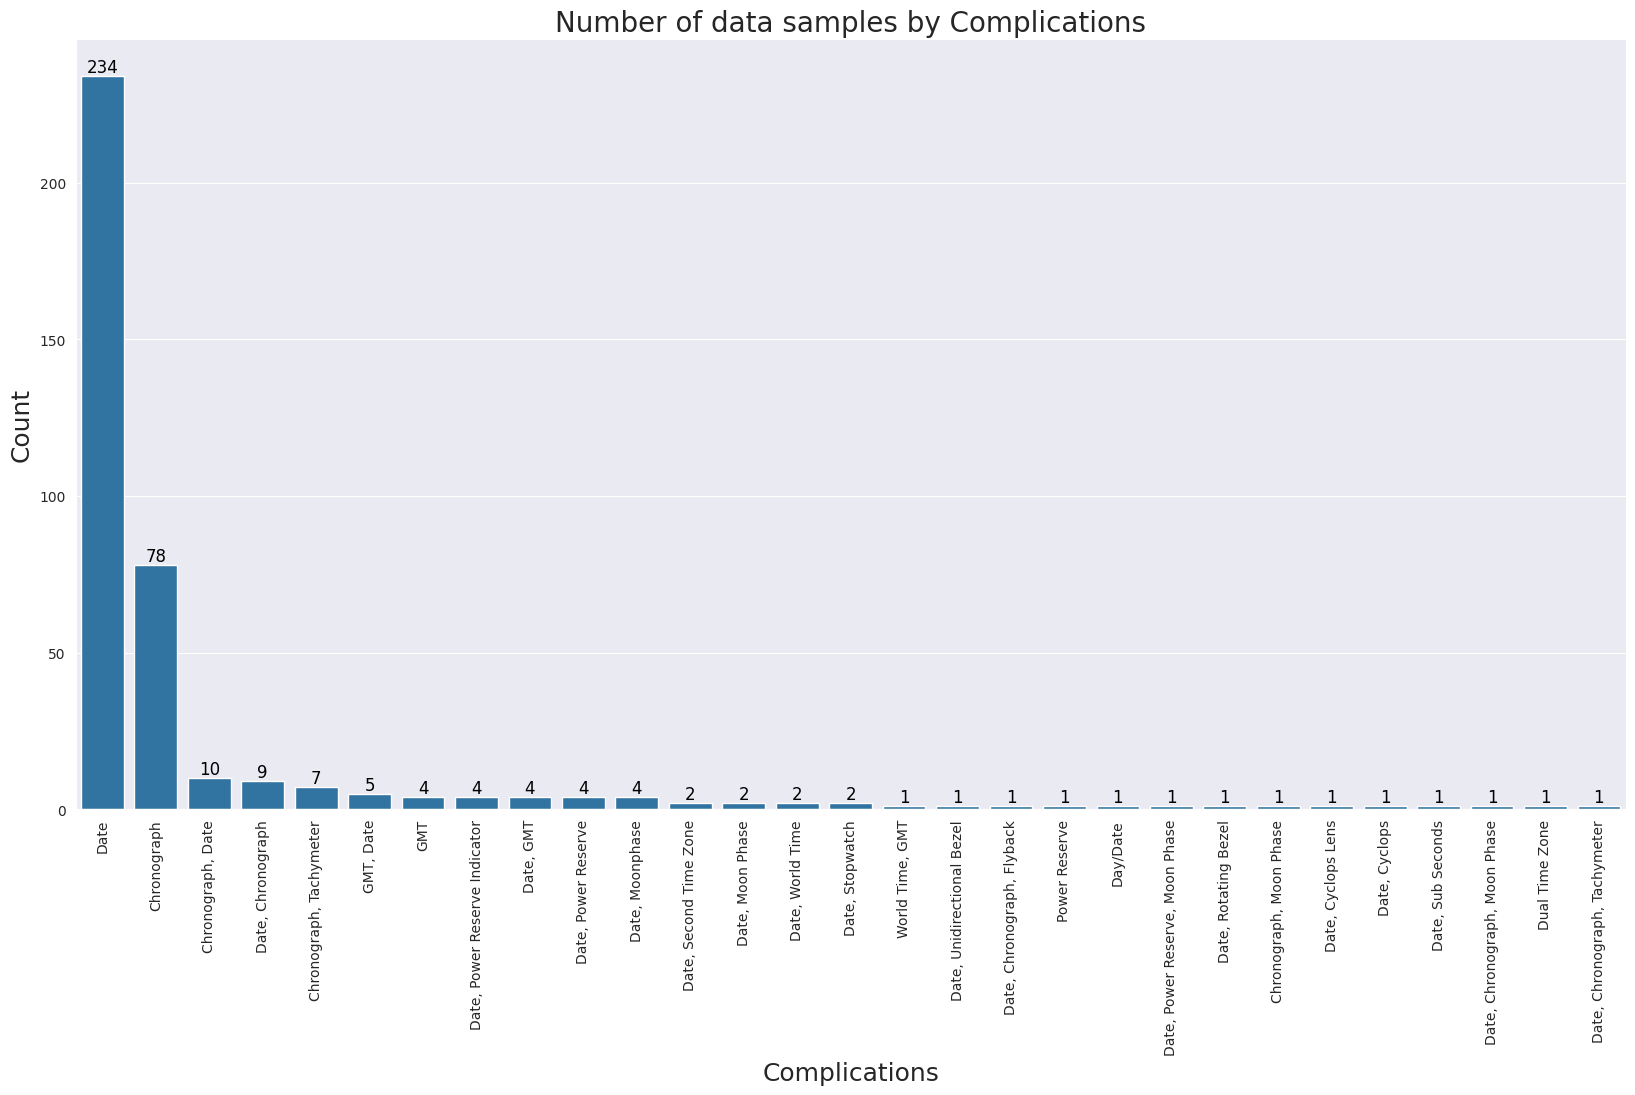

In [47]:
for num,i in enumerate(catcols,1):
    plt.figure(figsize=(20, 10))
    ax = sns.countplot(x=df[i],data=df,order=df[i].value_counts().index)
    plt.xticks(rotation=90)
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width() / 2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
    # plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace = 0)
    plt.xlabel(catcols[num-1],fontsize=18)
    plt.ylabel("Count",fontsize=18)
    plt.title(f"Number of data samples by {catcols[num-1]}", fontsize=20)
    plt.savefig(f"../webapp/static/img/categorical_data_{num}.png",  bbox_inches='tight', transparent=True)
    plt.show()

### Numerical data

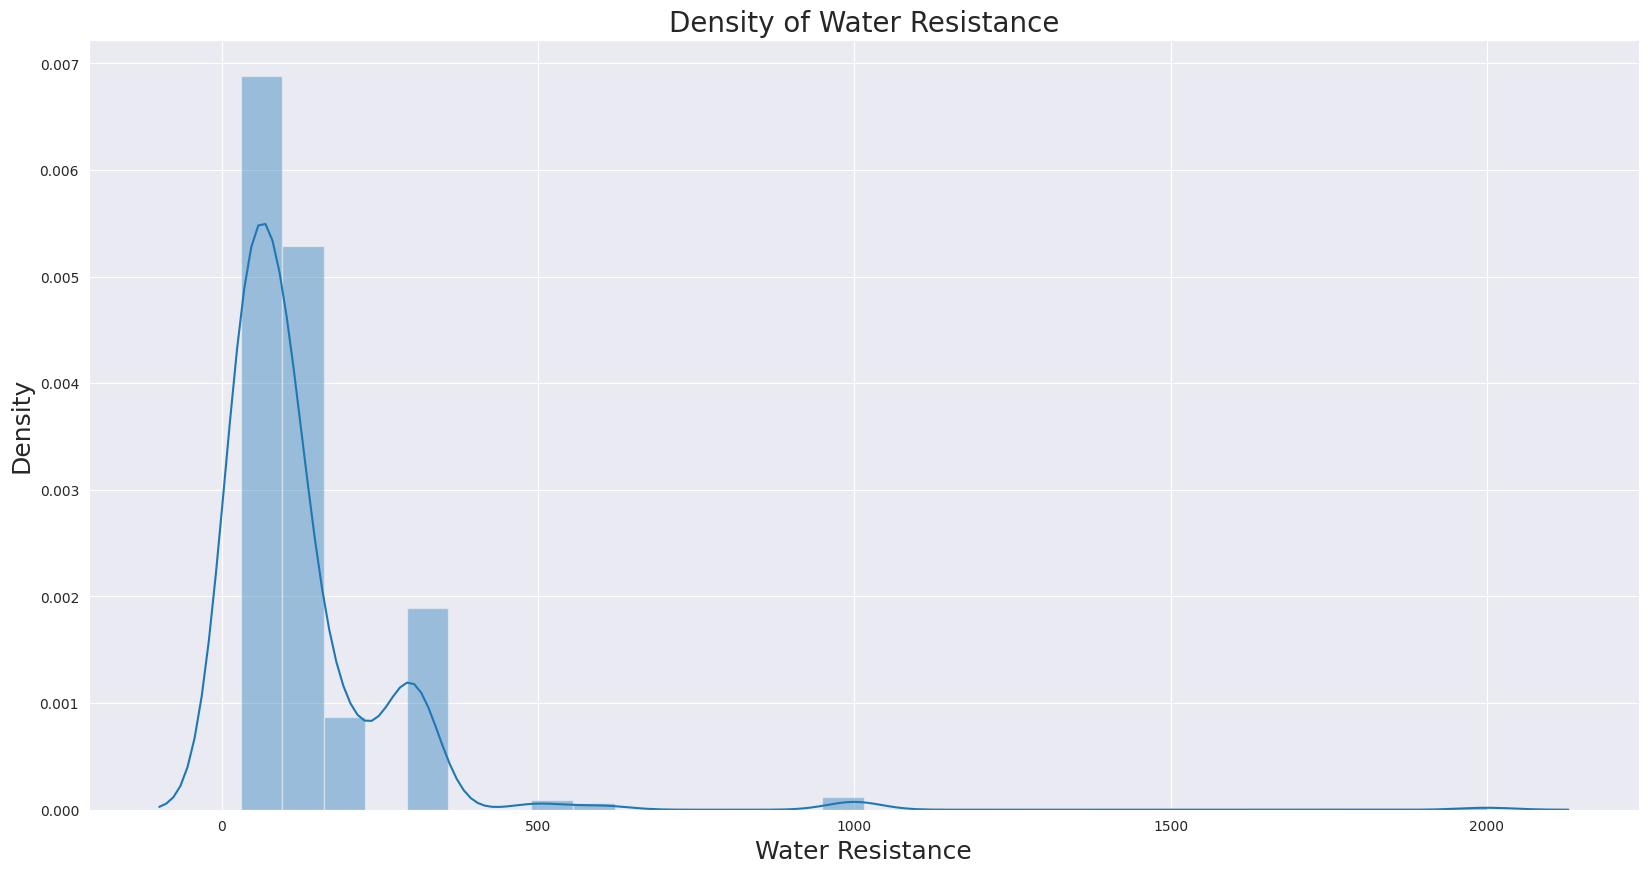

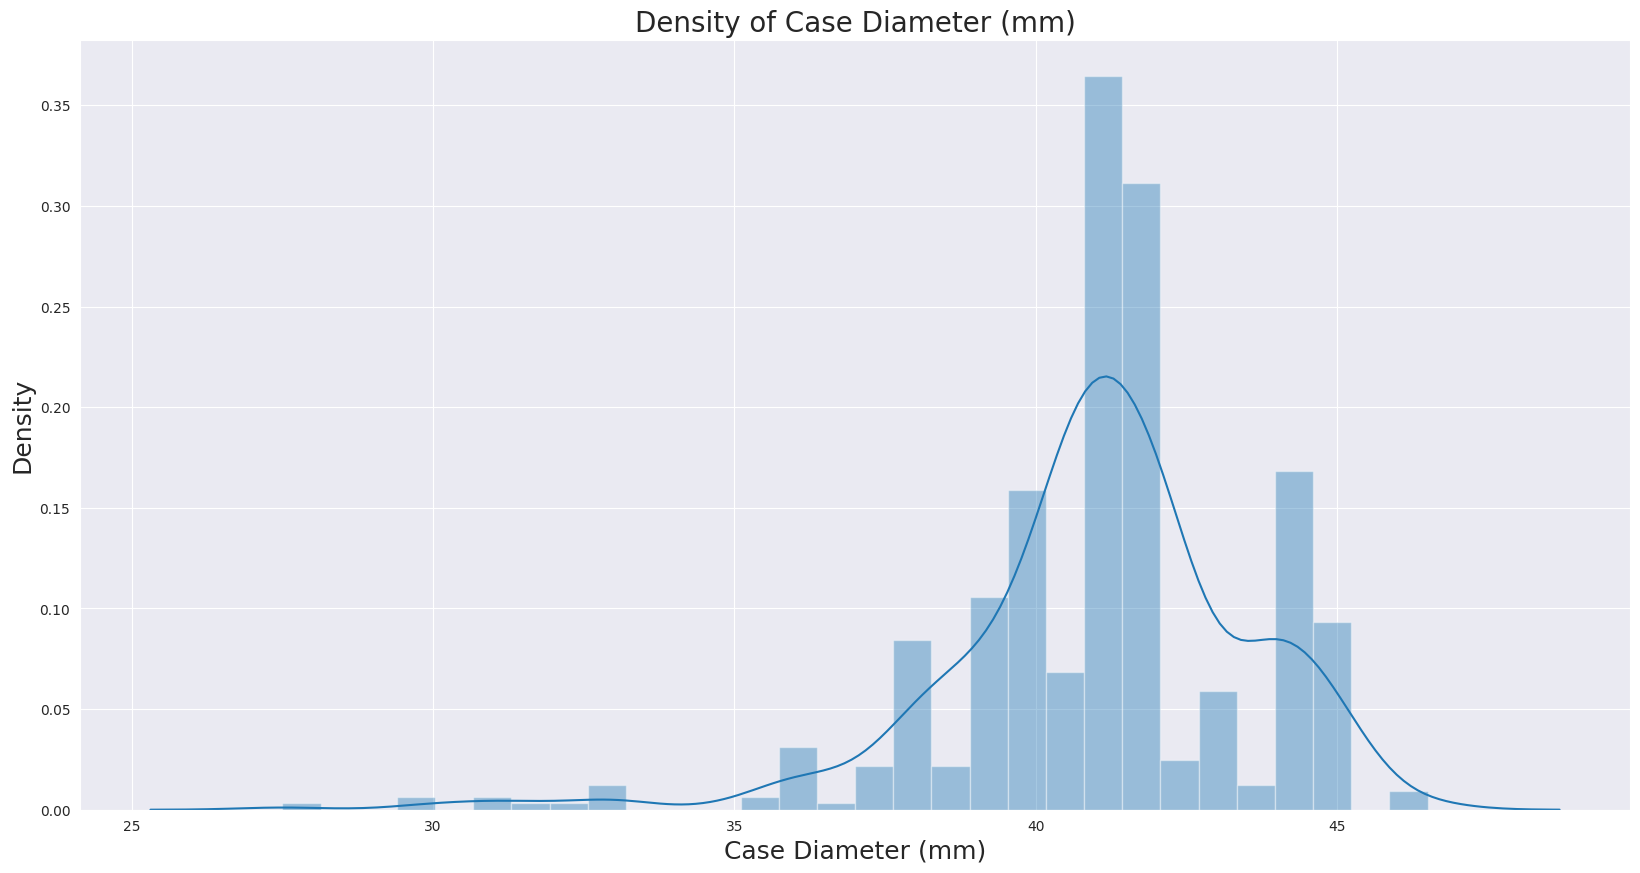

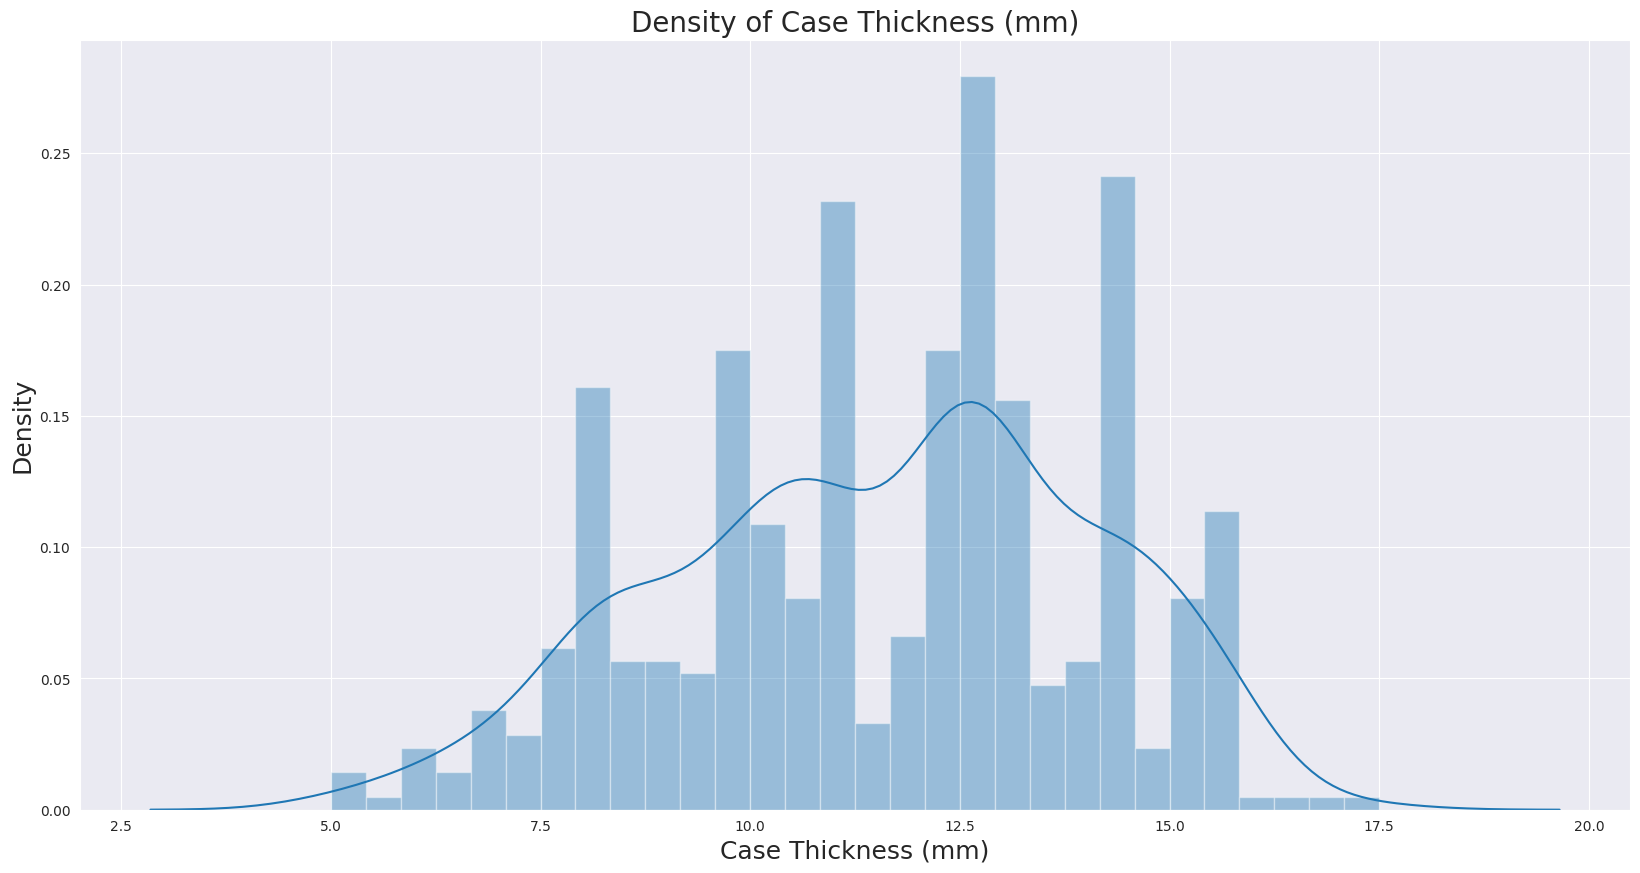

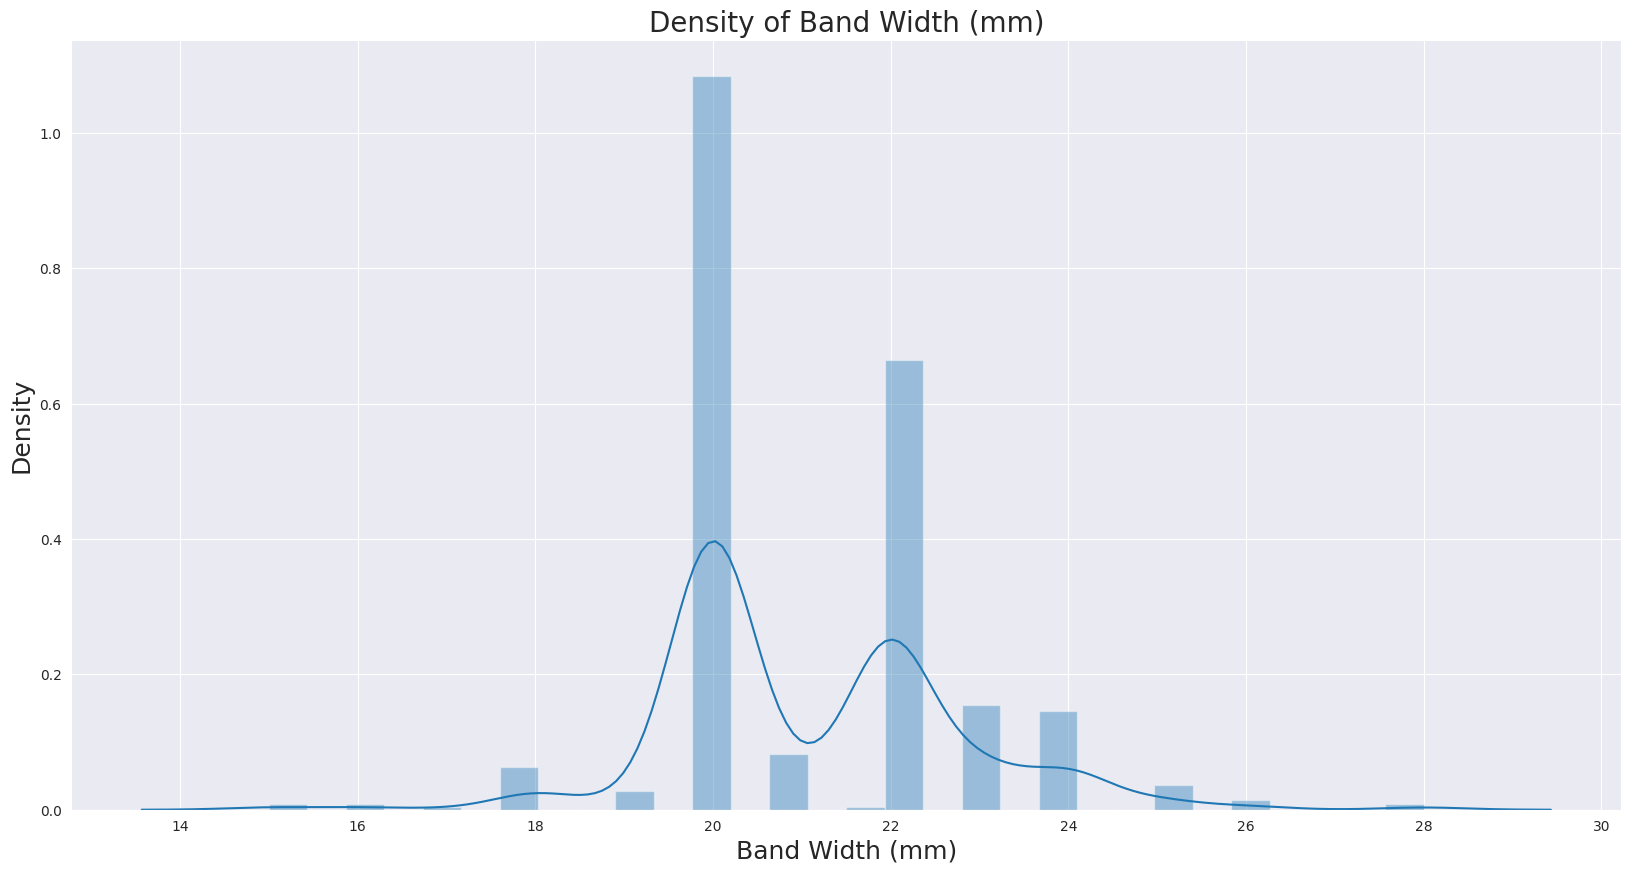

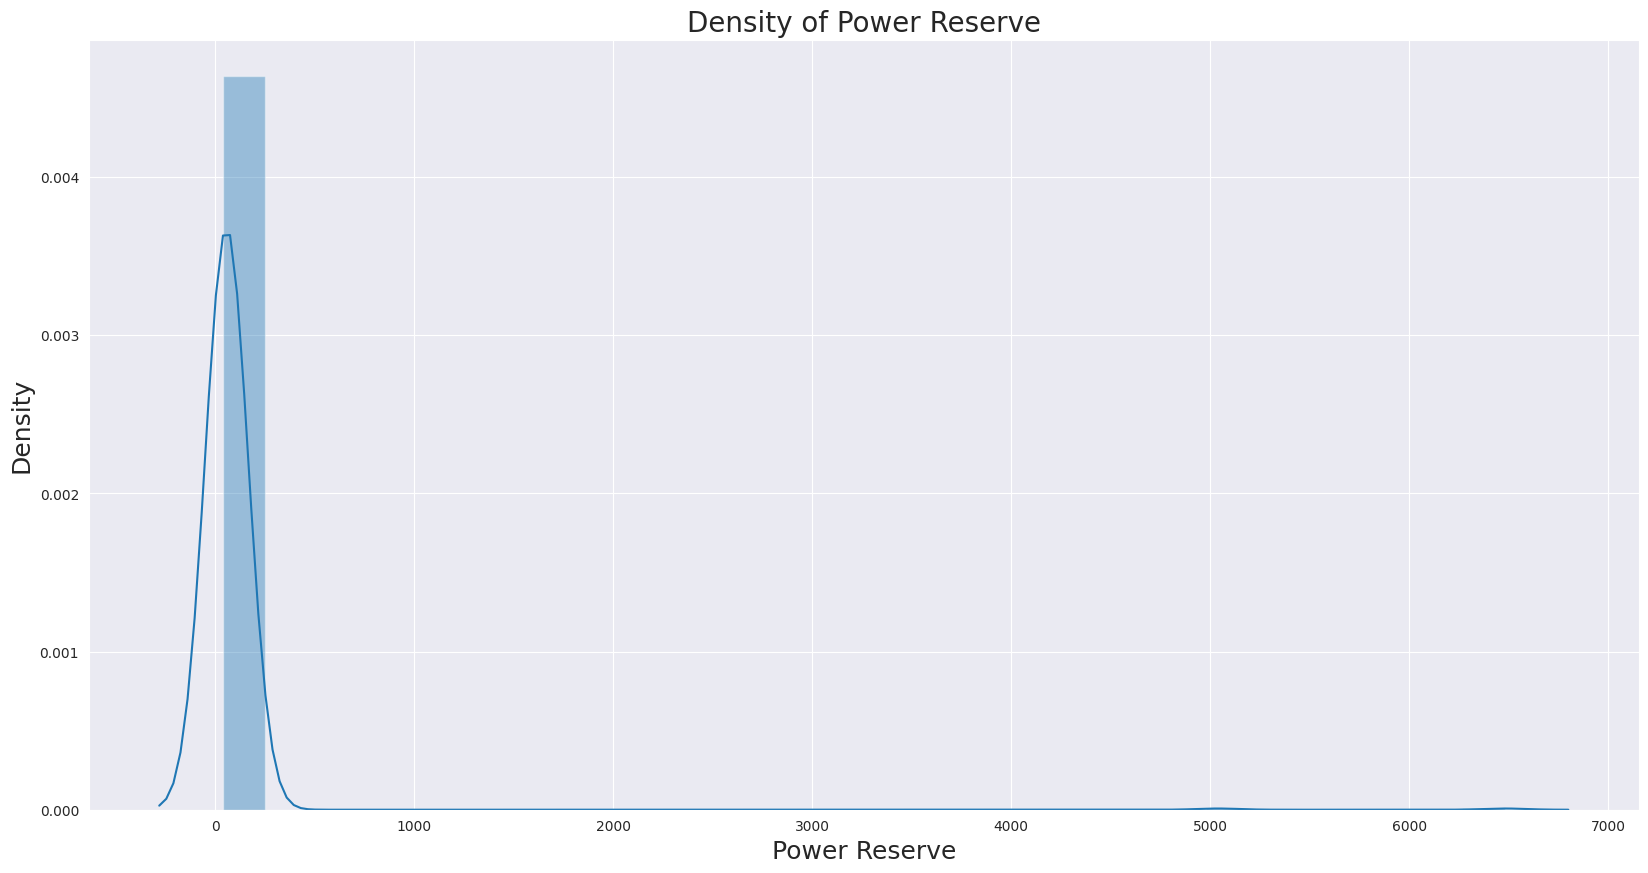

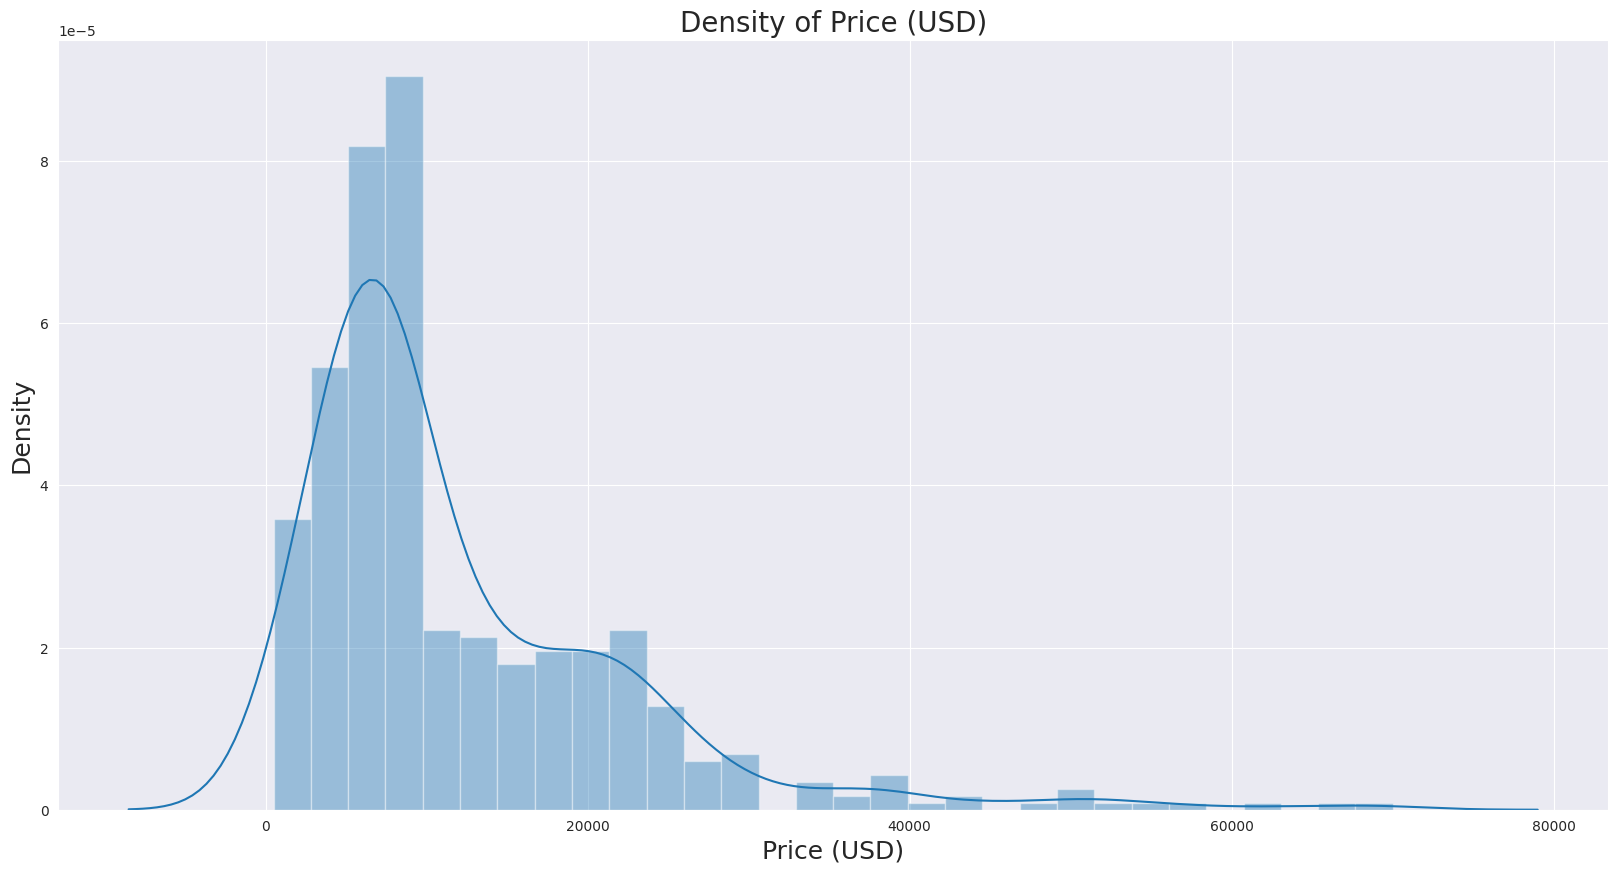

In [48]:
for num,i in enumerate(numcols,1):
    plt.figure(figsize=(20, 10))
    ax = sns.distplot(df[i],bins=30)
    plt.xlabel(numcols[num-1],fontsize=18)
    plt.ylabel("Density",fontsize=18)
    plt.title(f"Density of {numcols[num-1]}", fontsize=20)
    plt.savefig(f"../webapp/static/img/numerical_data_{num}.png",  bbox_inches='tight', transparent=True)
    plt.show()

### Outliers

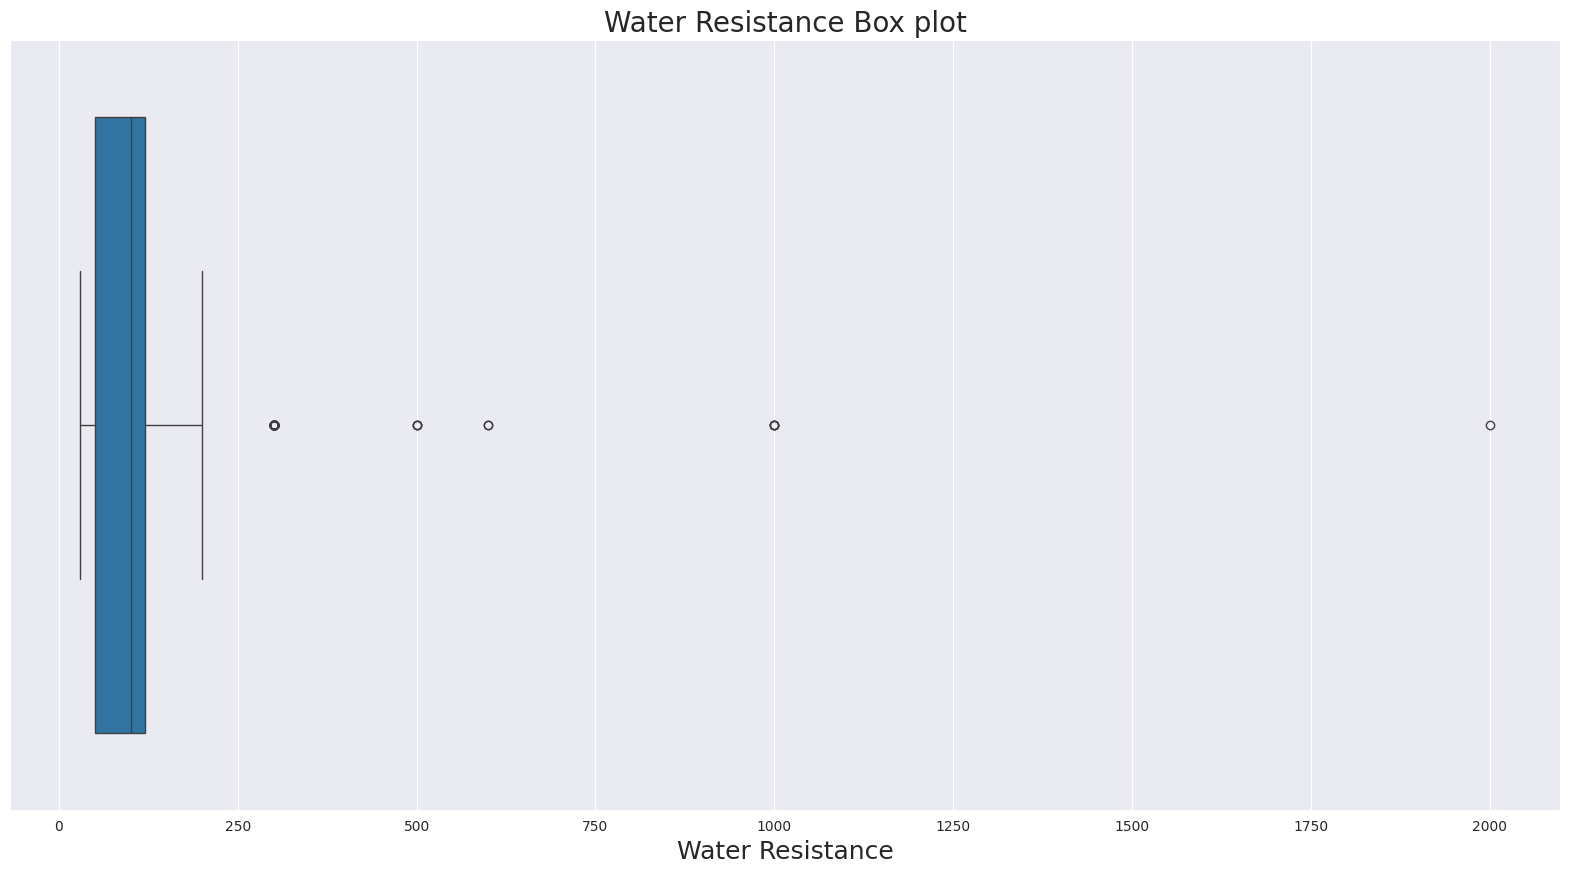

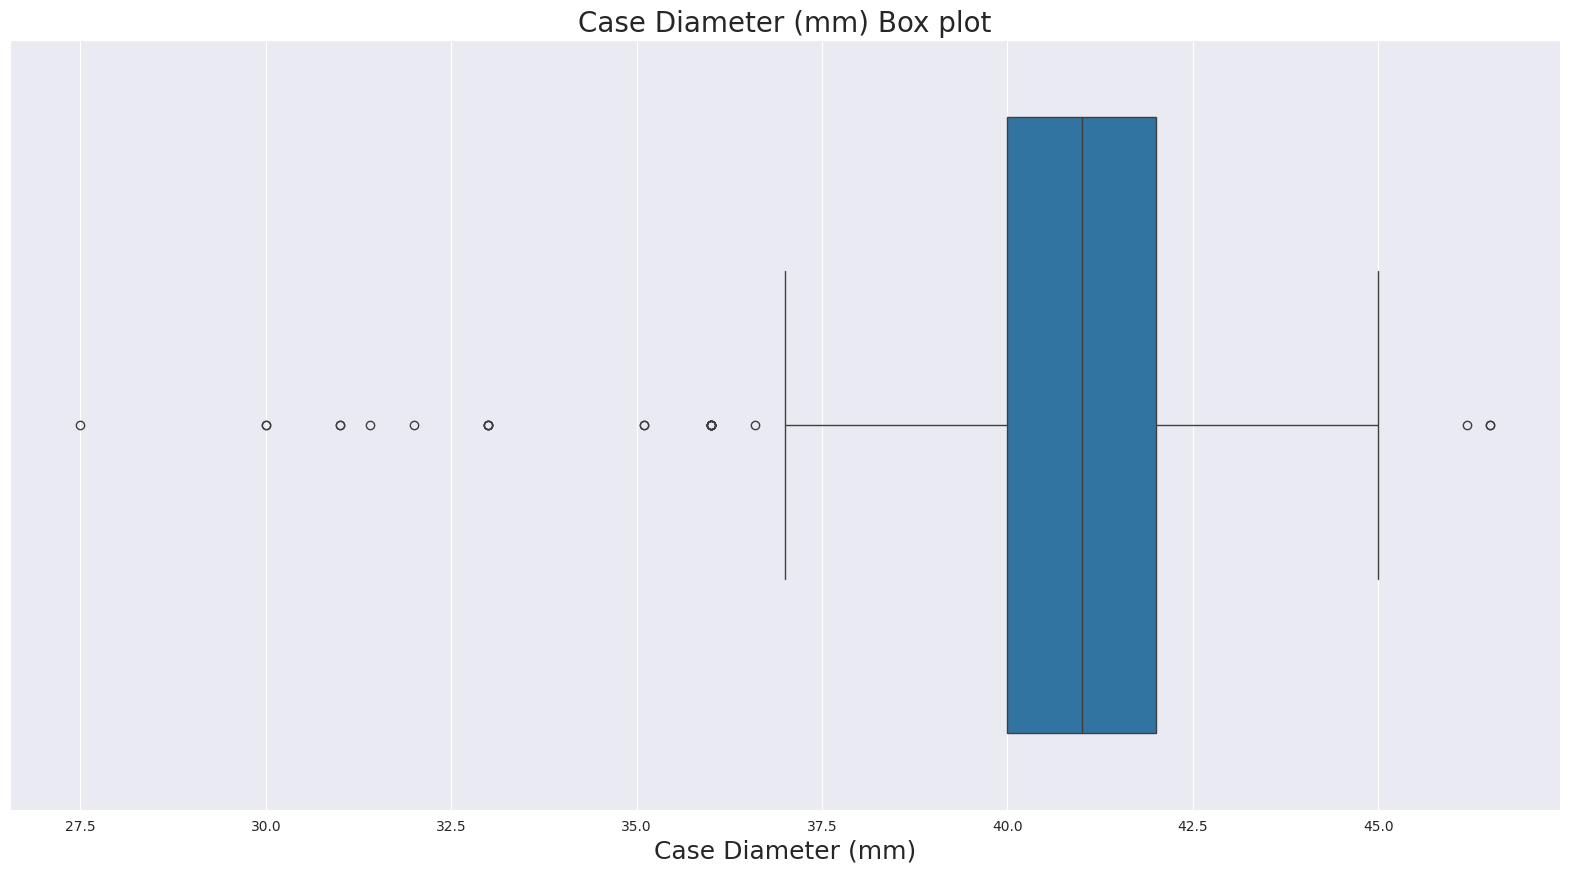

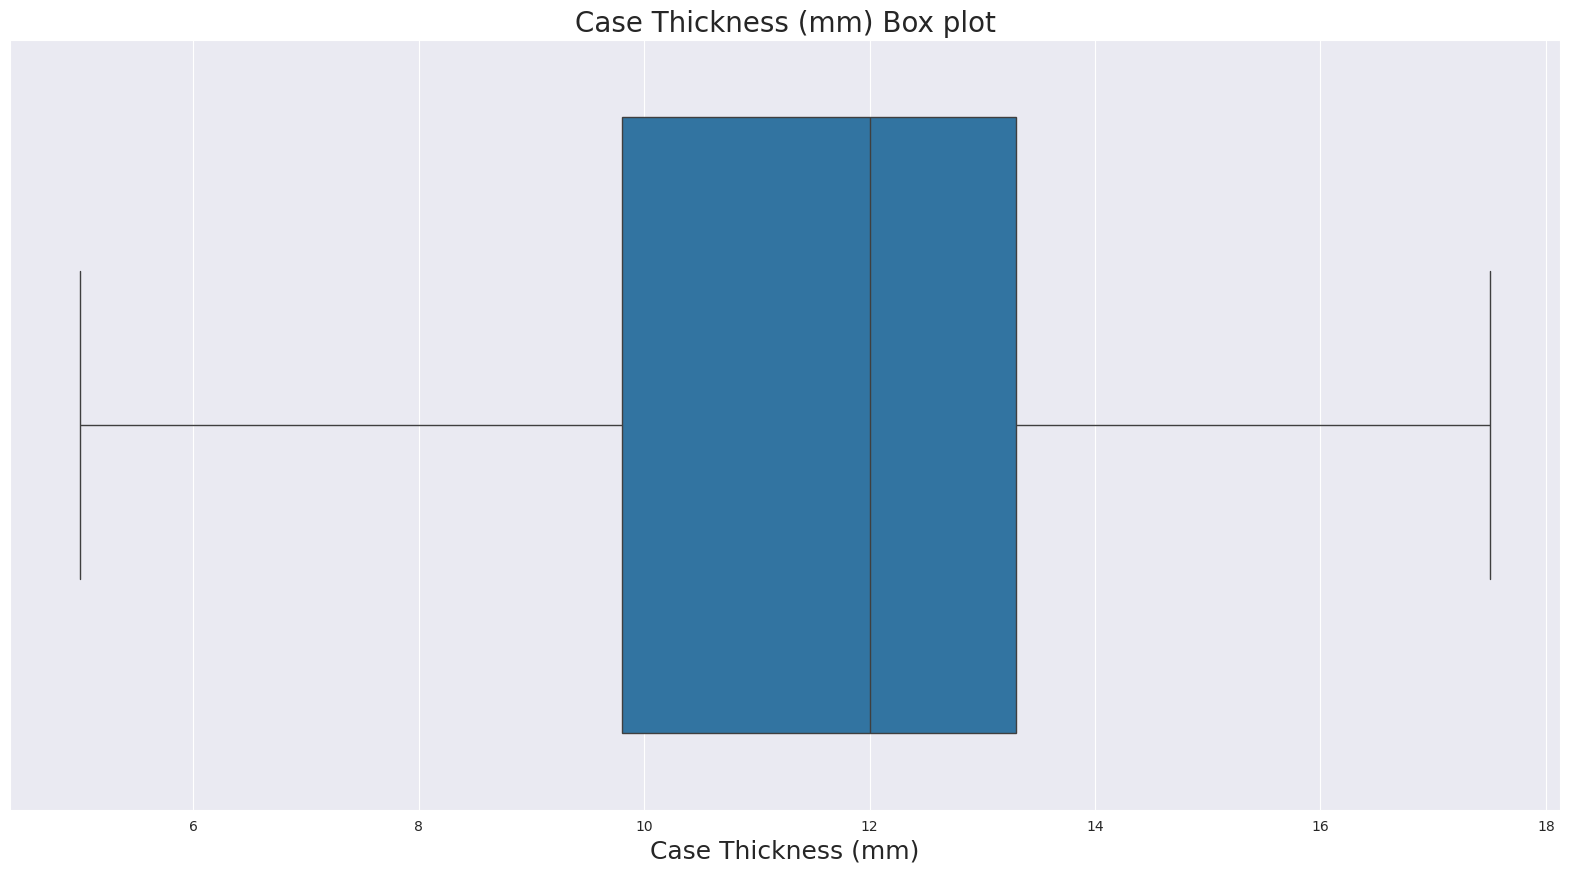

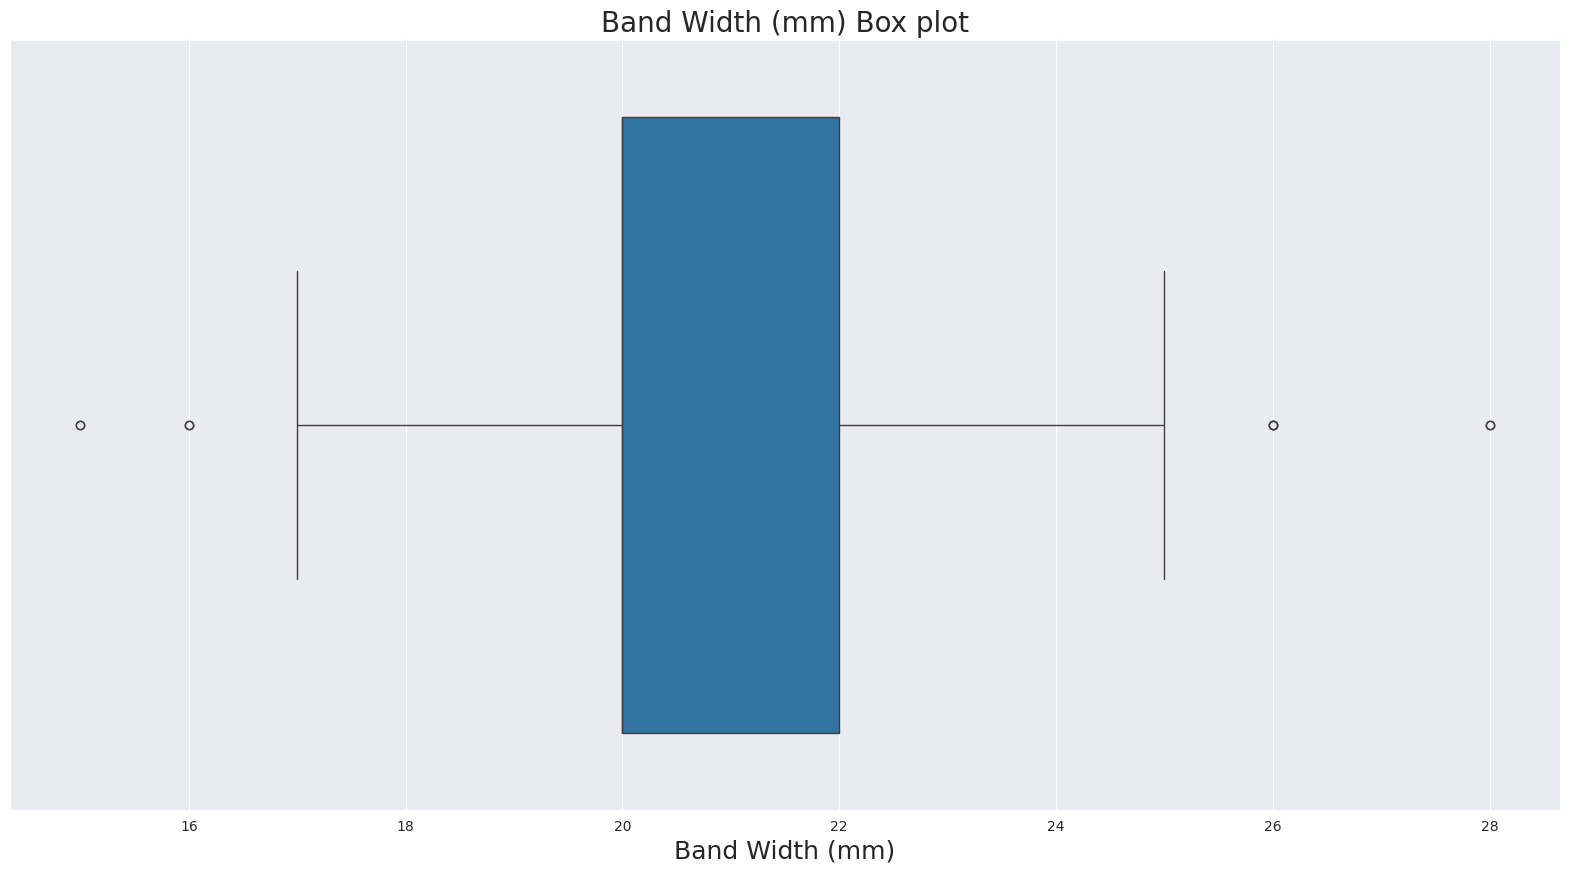

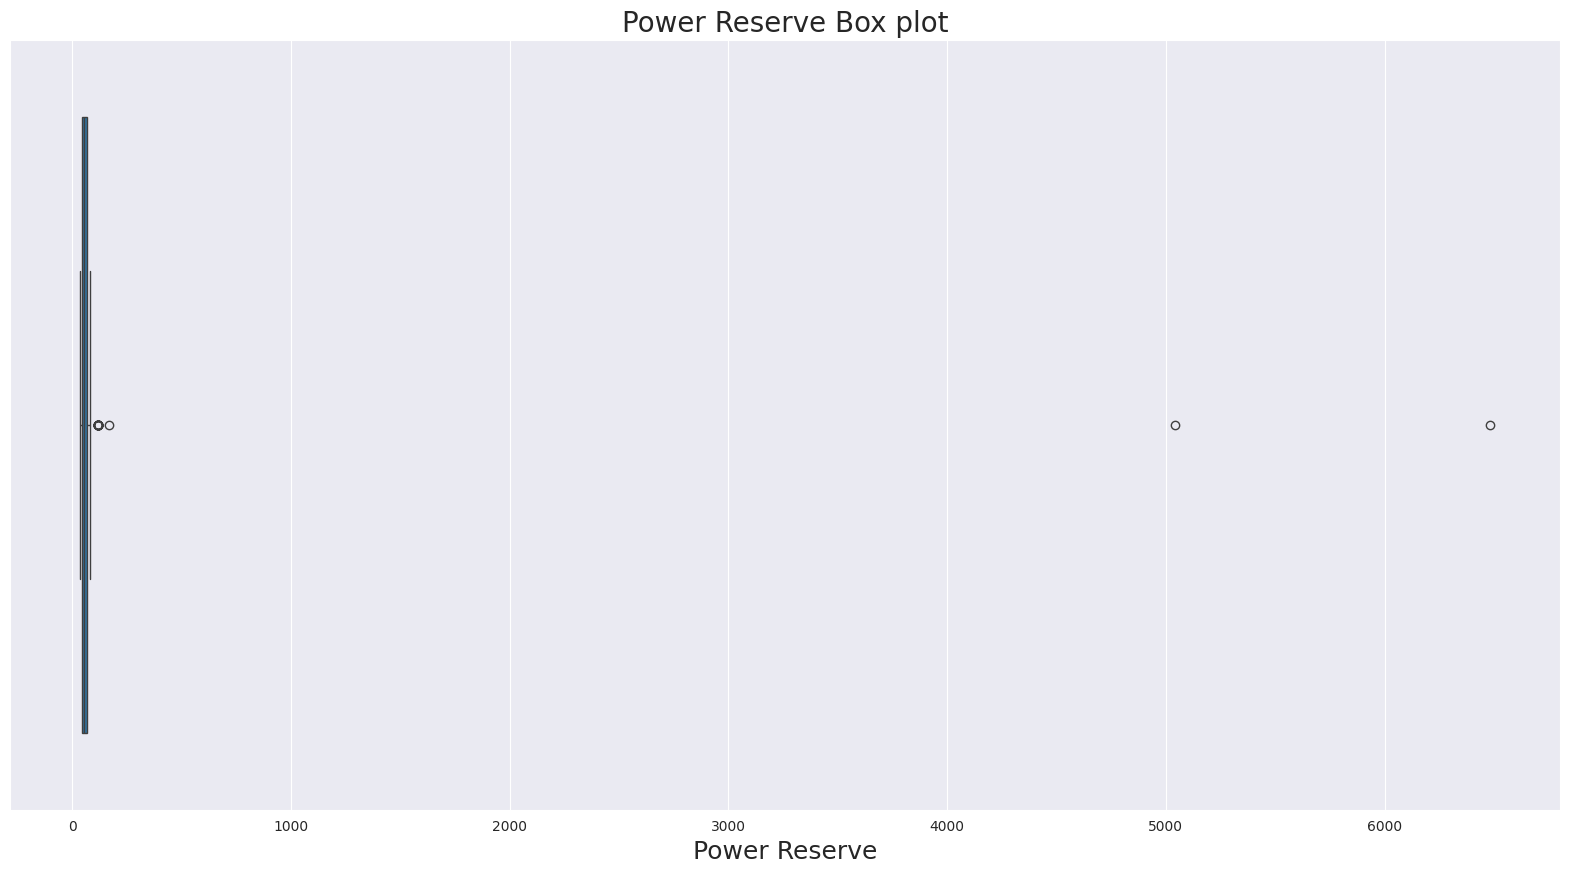

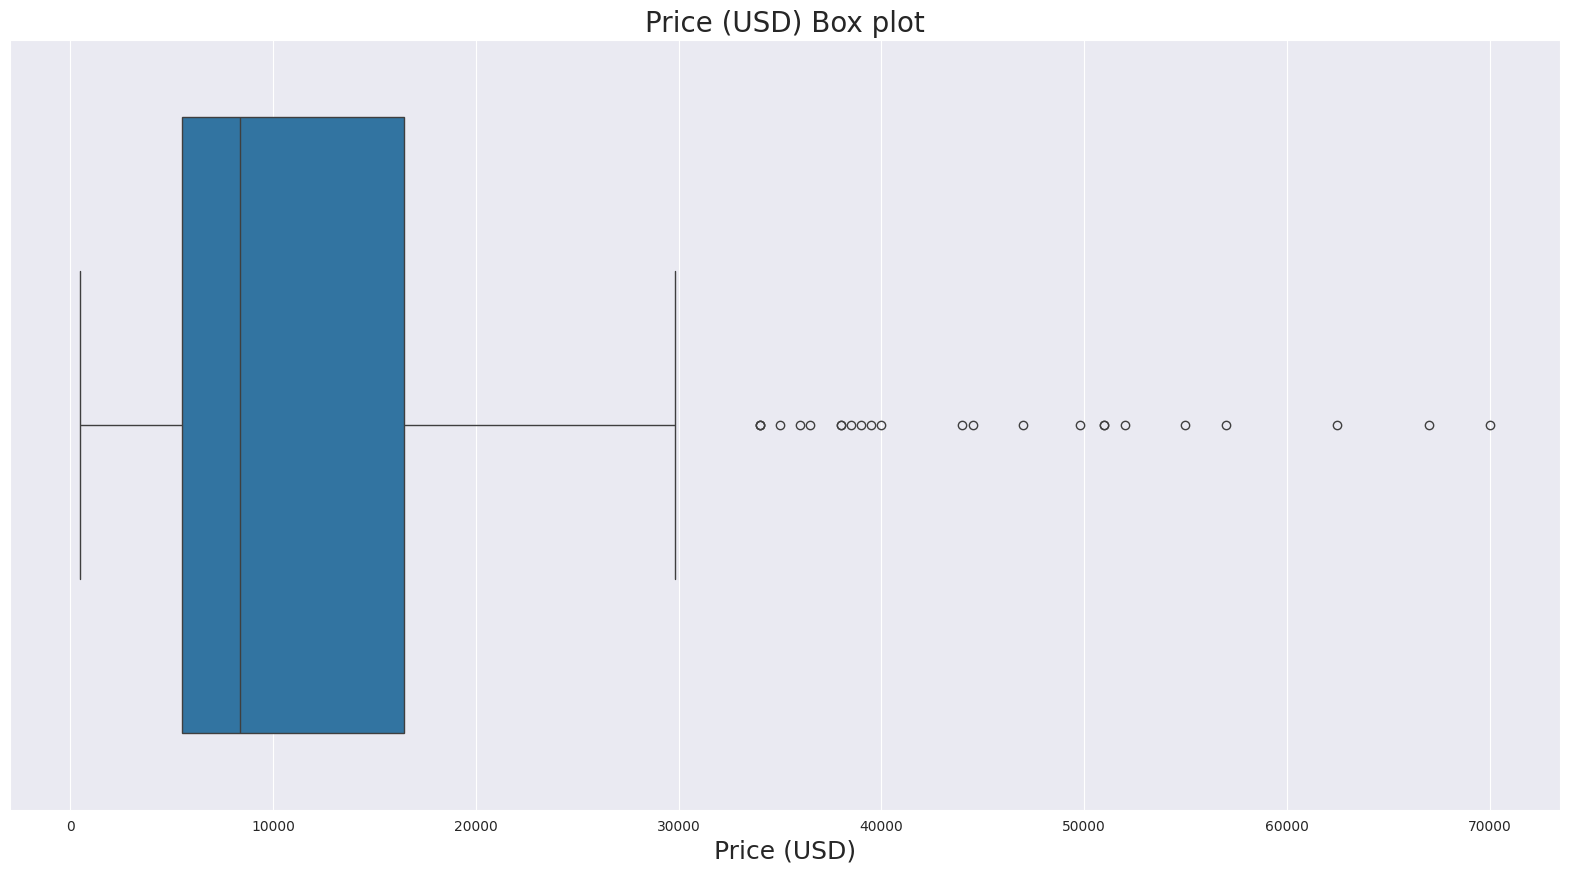

In [54]:
for num,i in enumerate(numcols,1):
    plt.figure(figsize=(20, 10))
    ax = sns.boxplot(x=df[i])
    plt.xlabel(numcols[num-1],fontsize=18)
    plt.title(f"{numcols[num-1]} Box plot", fontsize=20)
    plt.savefig(f"../webapp/static/img/numerical_data_outliers_{num}.png",  bbox_inches='tight', transparent=True)
    plt.show()

### Correlation

In [50]:
df[numcols].corr()

,Water Resistance,Case Diameter (mm),Case Thickness (mm),Band Width (mm),Power Reserve,Price (USD)
Water Resistance,1.000000,0.338450,0.386230,0.210643,0.043036,-0.132085
Case Diameter (mm),0.338450,1.000000,0.608353,0.628828,0.100295,-0.085783
Case Thickness (mm),0.386230,0.608353,1.000000,0.417901,0.078272,-0.408458
Band Width (mm),0.210643,0.628828,0.417901,1.000000,0.068397,-0.088549
Power Reserve,0.043036,0.100295,0.078272,0.068397,1.000000,-0.068056
Price (USD),-0.132085,-0.085783,-0.408458,-0.088549,-0.068056,1.000000


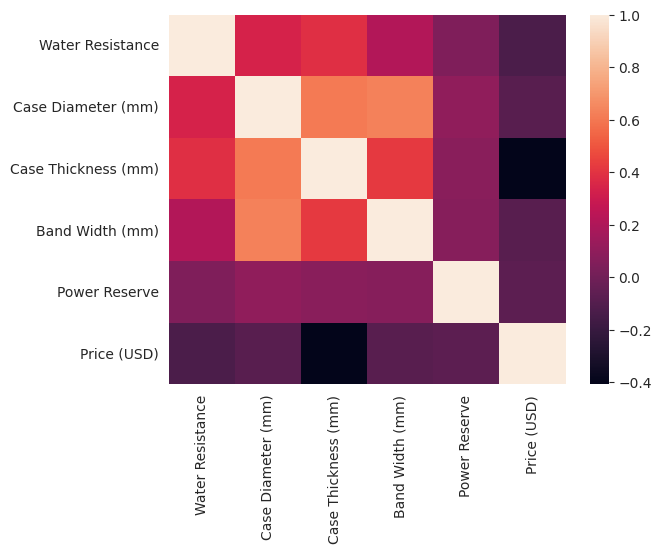

In [51]:
sns.heatmap(df[numcols].corr())
plt.savefig(f"../webapp/static/img/numerical_data_correlation.png",  bbox_inches='tight', transparent=True)

### Complications column

In [20]:
lst1 = []
for i in df['Complications'].dropna():
    lst1.extend(i.split(','))
# lst1

In [21]:
lst2 = [el.lstrip() for el in lst1]

In [22]:
from collections import Counter
Counter(lst2)

Counter({'Date': 291,
         'Chronograph': 108,
         'GMT': 14,
         'Tachymeter': 8,
         'Power Reserve': 6,
         'Moon Phase': 5,
         'Power Reserve Indicator': 4,
         'Moonphase': 4,
         'World Time': 3,
         'Second Time Zone': 2,
         'Stopwatch': 2,
         'Unidirectional Bezel': 1,
         'Flyback': 1,
         'Day/Date': 1,
         'Rotating Bezel': 1,
         'Cyclops': 1,
         'Cyclops Lens': 1,
         'Sub Seconds': 1,
         'Dual Time Zone': 1})

Date is the most common additional function in the watches.